# American Coffee Taste Test

This dataset is based off a nationwide survey within the USA.

## 1.0 Data Inspection
The aim of this section is to understand the type of data that is available and the types of data cleaning/engineering that could be performed to make the dataset more understandable.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# Reading the Dataset from kaggle.
CoffeeData = pd.read_csv("coffee_survey.csv")

In visual Inspection:
- Submission_ID shows the be a unique ID meaning it can be used as a primary key.
- The data is generally clean and well populated.

In [123]:
CoffeeData.head()

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,Bean-to-cup machine,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,Pour over,NaN,NaN,NaN,Latte,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
PrimaryIDCheck = CoffeeData['submission_id'].duplicated()
PrimaryIDCheck = PrimaryIDCheck.any()
PrimaryIDCheck

np.False_

In [125]:
CoffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   submission_id                 4042 non-null   object 
 1   age                           4011 non-null   object 
 2   cups                          3949 non-null   object 
 3   where_drink                   3972 non-null   object 
 4   brew                          3657 non-null   object 
 5   brew_other                    678 non-null    object 
 6   purchase                      710 non-null    object 
 7   purchase_other                31 non-null     object 
 8   favorite                      3980 non-null   object 
 9   favorite_specify              114 non-null    object 
 10  additions                     3959 non-null   object 
 11  additions_other               48 non-null     object 
 12  dairy                         1686 non-null   object 
 13  swe

In [126]:
CoffeeData.columns

Index(['submission_id', 'age', 'cups', 'where_drink', 'brew', 'brew_other',
       'purchase', 'purchase_other', 'favorite', 'favorite_specify',
       'additions', 'additions_other', 'dairy', 'sweetener', 'style',
       'strength', 'roast_level', 'caffeine', 'expertise',
       'coffee_a_bitterness', 'coffee_a_acidity',
       'coffee_a_personal_preference', 'coffee_a_notes', 'coffee_b_bitterness',
       'coffee_b_acidity', 'coffee_b_personal_preference', 'coffee_b_notes',
       'coffee_c_bitterness', 'coffee_c_acidity',
       'coffee_c_personal_preference', 'coffee_c_notes', 'coffee_d_bitterness',
       'coffee_d_acidity', 'coffee_d_personal_preference', 'coffee_d_notes',
       'prefer_abc', 'prefer_ad', 'prefer_overall', 'wfh', 'total_spend',
       'why_drink', 'why_drink_other', 'taste', 'know_source', 'most_paid',
       'most_willing', 'value_cafe', 'spent_equipment', 'value_equipment',
       'gender', 'gender_specify', 'education_level', 'ethnicity_race',
       'ethnici

In [127]:


# Get unique values for all columns
unique_values = {col: CoffeeData[col].unique()[:5] for col in CoffeeData.columns}

# Print unique values for all columns
for col, values in unique_values.items():
    print(f"Unique values in {col}: {values}")


Unique values in submission_id: ['gMR29l' 'BkPN0e' 'W5G8jj' '4xWgGr' 'QD27Q8']
Unique values in age: ['18-24 years old' '25-34 years old' '35-44 years old' '55-64 years old'
 nan]
Unique values in cups: [nan 'Less than 1' '2' '1' '3']
Unique values in where_drink: [nan 'At a cafe, At the office, At home, On the go' 'At a cafe'
 'On the go, At a cafe, At home, At the office' 'At the office']
Unique values in brew: [nan 'Pod/capsule machine (e.g. Keurig/Nespresso)' 'Bean-to-cup machine'
 'Coffee brewing machine (e.g. Mr. Coffee)' 'Pour over']
Unique values in brew_other: [nan 'Aeropress' 'Mokkapot' 'Moka pot' 'Aeropress, moka pot.']
Unique values in purchase: [nan
 'National chain (e.g. Starbucks, Dunkin), Local cafe, Drive-thru, Specialty coffee shop, Other'
 'Local cafe, Specialty coffee shop'
 'National chain (e.g. Starbucks, Dunkin), Local cafe, Specialty coffee shop'
 'Local cafe']
Unique values in purchase_other: [nan
 'I don’t, cafe coffee has never appealed to me because of the c

## The Aim:
We will be looking at specifically which cofee was rated the best and the comments that were made regarding them. <br>
To be begin with, these are the questions we will be answering:
- Which coffee was rated the highest?
- How do the coffee styles vary with bitterness, acidity & preference?
- Which comments were the most populer for each coffee style?
- What made the highest rated coffee the most preferred?

## 2.0 Data Analysis


In [128]:
#Keep all the relevant columns
Data = CoffeeData[['submission_id','coffee_a_bitterness', 'coffee_a_acidity',
       'coffee_a_personal_preference', 'coffee_a_notes', 'coffee_b_bitterness',
       'coffee_b_acidity', 'coffee_b_personal_preference', 'coffee_b_notes',
       'coffee_c_bitterness', 'coffee_c_acidity',
       'coffee_c_personal_preference', 'coffee_c_notes', 'coffee_d_bitterness',
       'coffee_d_acidity', 'coffee_d_personal_preference', 'coffee_d_notes',
       'prefer_abc', 'prefer_ad', 'prefer_overall']]

In [129]:
RowCheck = Data.drop(columns = ['submission_id'])
#Are there any rows with all NA
RowswithNA = RowCheck.isna().all(axis=1)
#There are 226 rows which come up with all NA
RowswithNA.sum()


np.int64(226)

In [130]:
#Update the DataFrame
Data = Data[~RowswithNA]

### 2.1 Which coffee was rated the highest?

In [131]:
HighestOverall = pd.DataFrame(Data['prefer_overall'].value_counts())
DesiredIndex = ['Coffee A', 'Coffee B', 'Coffee C', 'Coffee D']
HighestOverall = HighestOverall.reindex(DesiredIndex)

CoffeeNames = {'Coffee A': 'Klatch', 'Coffee B': 'Equator', 'Coffee C': 'George Howell', 'Coffee D': 'Black and White'}

HighestOverall = HighestOverall.rename(CoffeeNames)

In [132]:
# Extract data for plotting
categories = HighestOverall.index
counts = HighestOverall['count']


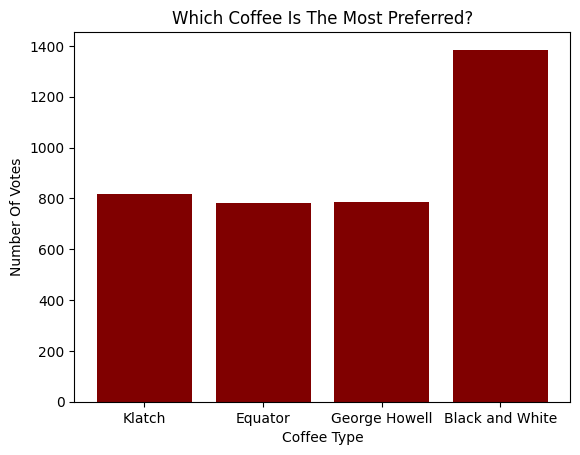

In [133]:
# Plotting
plt.bar(categories, counts, color = 'maroon')
plt.xlabel('Coffee Type')
plt.ylabel('Number Of Votes')
plt.title('Which Coffee Is The Most Preferred?')
plt.show()

In [134]:
HighestOverall['Percentage'] = round(HighestOverall['count']/HighestOverall['count'].sum()*100,2)
HighestOverall

,count,Percentage
prefer_overall,,
Klatch,818,21.70
Equator,783,20.77
George Howell,784,20.80
Black and White,1385,36.74


### Findings
What is easily seen is that Black and White is by far the most popular coffee product with a considerable 1385 votes.

Besides that, the other three coffees seem to have around the same amount of votes with minimal fluctiations. However, Klatch seems to be slightly in the lead.

Overall, the highest rated coffees in order are:
- Black and White (36.7%)
- Klatch (21.7%)
- George Howell (20.8%)
- Equator (20%.8)